<a href="https://colab.research.google.com/github/ghafoor545/DEP-_ML/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Data Cleaning and Preprocessing**

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/churn-bigml-80.csv')

# Convert categorical columns to numerical
df['International plan'] = df['International plan'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Voice mail plan'] = df['Voice mail plan'].apply(lambda x: 1 if x == 'Yes' else 0)

# Ensure the 'Churn' column is treated as an integer for modeling
df['Churn'] = df['Churn'].astype(int)

# Check the first few rows to confirm changes
print(df.head())


  State  Account length  Area code  International plan  Voice mail plan  \
0    KS             128        415                   0                1   
1    OH             107        415                   0                1   
2    NJ             137        415                   0                0   
3    OH              84        408                   1                0   
4    OK              75        415                   1                0   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1         

# **Step 2: Exploratory Data Analysis (EDA)**

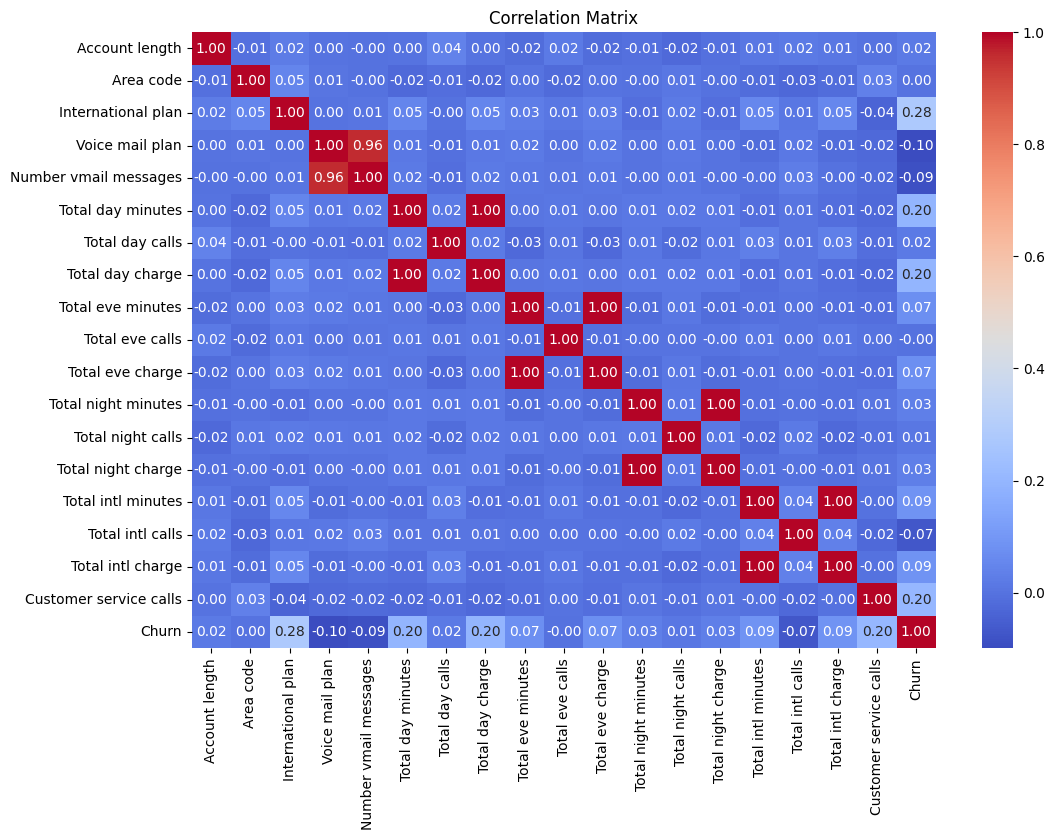

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-numeric columns
numeric_df = df.drop(['State'], axis=1)

# Correlation matrix to check relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



# **Step 3: Feature Engineering**

In [4]:
from sklearn.model_selection import train_test_split

# Select features and target
X = df.drop(['Churn', 'State'], axis=1)  # Drop 'State' as it might be less relevant
y = df['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Optional: Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# **Step 4: Model Selection and Training**

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict
y_pred_log = log_reg.predict(X_test)

# Evaluate
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.92       683
           1       0.60      0.22      0.32       117

    accuracy                           0.86       800
   macro avg       0.74      0.60      0.62       800
weighted avg       0.84      0.86      0.84       800

Confusion Matrix:
 [[666  17]
 [ 91  26]]


# ***Random Forest:***

In [6]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       683
           1       0.98      0.68      0.80       117

    accuracy                           0.95       800
   macro avg       0.96      0.84      0.88       800
weighted avg       0.95      0.95      0.95       800

Confusion Matrix:
 [[681   2]
 [ 38  79]]


# **Step 5: Model Evaluation and Fine-Tuning**

Logistic Regression ROC AUC: 0.5986660159427363
Random Forest ROC AUC: 0.8361427087634994


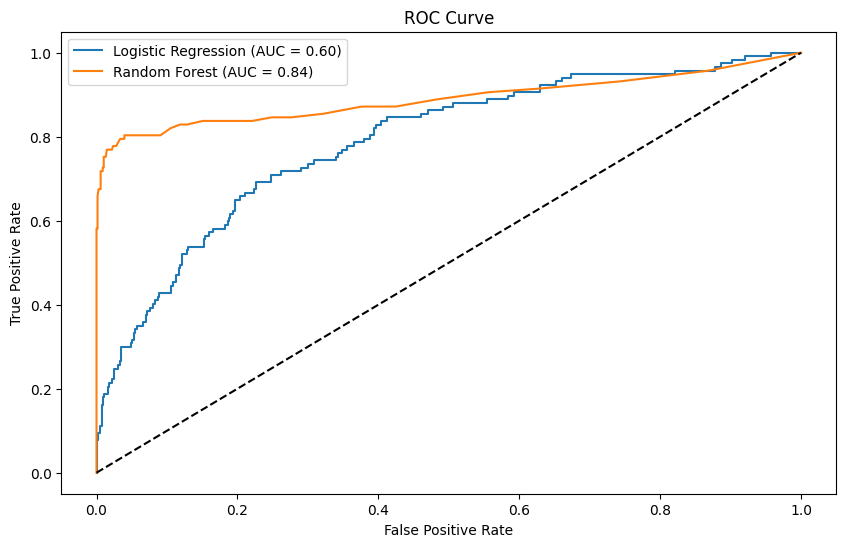

In [7]:
from sklearn.metrics import roc_auc_score, roc_curve

# Calculate ROC-AUC for Logistic Regression
log_reg_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
rf_roc_auc = roc_auc_score(y_test, rf_model.predict(X_test))

print(f'Logistic Regression ROC AUC: {log_reg_roc_auc}')
print(f'Random Forest ROC AUC: {rf_roc_auc}')

# Plot ROC Curve for both models
log_fpr, log_tpr, _ = roc_curve(y_test, log_reg.predict_proba(X_test)[:, 1])
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 6))
plt.plot(log_fpr, log_tpr, label=f'Logistic Regression (AUC = {log_reg_roc_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
